<a href="https://colab.research.google.com/github/raynajindal/IMDB_MovieReview_Sentimental_Analysis/blob/main/IMDBMovieReviewsSentimentalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string

import nltk.downloader
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv') 

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

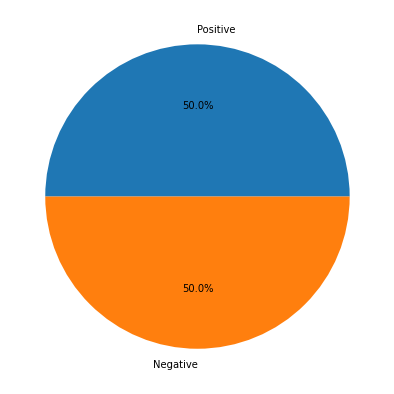

In [6]:
df_group_by_score = df.groupby('sentiment').size()

labels = ["Positive", "Negative"]

fig = plt.figure(figsize =(10, 7))

plt.pie(df_group_by_score,autopct='%.1f%%',labels = labels)
plt.show()

In [7]:
df['sentiment'] = df['sentiment'].replace(['positive','negative'],[1,0])

In [8]:
df['clean_review'] = df['review'].apply(lambda x: "".join([item for item in x.lower() if item not in string.punctuation]))

df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production br br the filmin...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love in the time of money is a ...


In [9]:
df['clean_review'] = df['clean_review'].apply(nltk.word_tokenize)
df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,1,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,1,"[a, wonderful, little, production, br, br, the..."
2,I thought this was a wonderful way to spend ti...,1,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,0,"[basically, theres, a, family, where, a, littl..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"[petter, matteis, love, in, the, time, of, mon..."


In [10]:
stop_words = stopwords.words('english')

df['clean_review'] = df['clean_review'].apply(lambda x: [item for item in x if item not in stop_words])
df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,1,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production. <br /><br />The...,1,"[wonderful, little, production, br, br, filmin..."
2,I thought this was a wonderful way to spend ti...,1,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,0,"[basically, theres, family, little, boy, jake,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"[petter, matteis, love, time, money, visually,..."


In [11]:
ps = PorterStemmer()
df['clean_review'] = df['clean_review'].apply(lambda x: ' '.join([ps.stem(y) for y in x]))
df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,1,one review mention watch 1 oz episod youll hoo...
1,A wonderful little production. <br /><br />The...,1,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


In [12]:
cv = TfidfVectorizer(max_features=5000)

# x variable
X = cv.fit_transform(df['clean_review'])

# y variable
y = df['sentiment']

In [13]:
from sklearn.model_selection import train_test_split
#testing data size is of 20% of entire data
x_train, x_test, y_train, y_test =train_test_split(X,y,test_size = 0.20, random_state=5) # train test split

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40000, 5000), (10000, 5000), (40000,), (10000,))

In [15]:
model = LogisticRegression(max_iter = 5000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8904

In [16]:
from sklearn.metrics import classification_report
Y_val_hat_logistics = model.predict(x_test)

print(classification_report(y_test,Y_val_hat_logistics))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4900
           1       0.89      0.90      0.89      5100

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [17]:
import pickle

pickle.dump(cv, open('count_vectorization_pkl', 'wb'))
pickle.dump(model, open('model_pkl', 'wb'))


In [18]:
cv_test = pickle.load(open('count_vectorization_pkl', 'rb'))
model_test = pickle.load(open('model_pkl', 'rb'))

In [19]:
sentence = "This is one of the wonderful movie I have seen"
#sentence = sentence.lower()
#sentence = sentence.split()
#sentence = [ps.stem(word) for word in sentence if word not in set(stopwords.words("english"))]
#sentence = " ".join(sentence)
#print(sentence)
sen = cv_test.transform([sentence])
model.predict(sen)[0]

1

In [20]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 47.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 24.8 MB/s eta 0:00:

In [21]:
import gradio as gr

def sentiment_analysis(sentence):
    sentence = sentence.lower()
    sentence = sentence.split()
    sentence = [ps.stem(word) for word in sentence if word not in set(stopwords.words("english"))]
    sentence = " ".join(sentence)
    sen = cv_test.transform([sentence])
    res = model.predict(sen)[0]
    print(res)
    if res == 1:
      return 'positive'
    else:
      return 'negative'

demo = gr.Interface(
    fn=sentiment_analysis, 
    inputs=gr.Textbox(placeholder="Enter a positive or negative sentence here..."), 
    outputs="label", 
    interpretation="default",
    examples=[["This is wonderful!"]])

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>